# Project 2: You and Data Science 

# Section 1: Dataset
For this project, the dataset I have chosen is from the game League of Legends and its Worlds 2023 Championship. League of Legends is a popular online "MOBA" (Multiplayer Online Battle Arena) that consists of 2 teams, each with 5 players and all playing a unique cast of "Champions" that have their own sets of abilities. The goal is to work with our team to take down the opposing teams "Nexus" (essentially just taking down their base). 

I picked this dataset because although I do not frequently play League anymore, it was for a while, my favorite game and I consumed everything and anything League related, including esports. Recently, I watched this years championship and the team SK Telecom 1, featuring legendary player "Faker", won the championship this year and Faker was able to reclaim his spot as a world champion for the 4th time. This really rekindled my interest I had in the esports scene. As to how I obtained this dataset, I utilized the link provided by the Project website at https://oracleselixir.com/stats/champions/byTournament/2023%20Season%20World%20Championship%2FMain%20Event. Below in the following cell is where I import the dataset. 


In [38]:
import pandas as pd
df = pd.read_csv("Worlds 2023 Main Event - Champion Stats - OraclesElixir.csv")
df

,Champion,Pos,GP,P%,B%,P+B%,W%,CTR%,K,D,...,GD10,XPD10,CSD10,CSPM,CS%P15,DPM,DMG%,GOLD%,WPM,WCPM
0,Aatrox,Top,26,32.9%,3.8%,36.7%,54%,58%,77,72,...,-147,40,-5.9,8.3,25.3%,508,25.4%,22.7%,0.32,0.16
1,Ahri,Middle,10,12.7%,5.1%,17.7%,50%,70%,27,20,...,-44,35,0.7,8.4,24.0%,522,24.8%,22.5%,0.56,0.34
2,Akali,Middle,11,13.9%,10.1%,24.1%,45%,82%,37,25,...,-104,-46,-1.5,8.4,23.7%,441,24.2%,22.7%,0.24,0.24
3,Alistar,Support,22,27.8%,24.1%,51.9%,27%,27%,14,78,...,-79,64,3.5,1,2.0%,120,6.4%,8.4%,1.63,0.28
4,Aphelios,ADC,22,27.8%,12.7%,40.5%,50%,59%,96,31,...,28,-36,-3.5,9.8,33.6%,612,30.3%,28.2%,0.4,0.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,Yone,Middle,3,3.8%,7.6%,15.2%,67%,67%,11,9,...,-16,-102,-6.3,9.6,29.7%,501,21.8%,24.1%,0.22,0.19
94,Yone,Top,3,3.8%,7.6%,15.2%,100%,100%,12,6,...,112,-85,12,9.5,30.1%,683,25.9%,24.1%,0.38,0.13
95,Zac,Jungle,1,1.3%,0.0%,1.3%,0%,100%,1,4,...,30,-46,-6,4.3,10.6%,291,13.7%,13.7%,0.51,0.35
96,Zeri,ADC,11,13.9%,7.6%,21.5%,45%,82%,41,18,...,-10,-29,4.2,10.5,34.3%,504,25.6%,28.6%,0.43,0.46


# Section 2: Exploratory Data Analysis

Something that may be useful to consider is Creep Score per minute (CSPM) for each champion at Worlds this year. CSPM is essentially how many units called "Minions" and "Monsters" the player is able to successful defeat. By defeating these minions and monsters, the player is able to collect "gold", a resource that acts as their source of income to fund purchases in a shop to power up their characters' abilities. A higher CSPM constitutes a higher average income, which is significant as being able to make more purchases faster than your opponent is one of many factors in winning games. 

One thing to note is that in League, there are 5 roles, that being "Top", "Jungle", "Middle", "ADC", and "Support" that each Champion will fit into. In every role other than support, a players main source of income will come from farming. For the champions playing the Support role, they do NOT primarily farm minions or monsters and as the name suggests, utilize their champions abilities to either focus on healing their teammates, "tanking" (absorbing large amounts of enemy team damage so that your team doesn't take too much damage) for the team, and/or using their abilities to enable team fights.

In context to this dataset, champions that had higher CSPM played at Worlds this year may reflect more viability as it may be easier to farm and collect gold with these champions (though this is not the only metric to gage how good a champion is, nor would it be the "best" metric to gage a champion's viability). However, it is important to note that CSPM - although partially dependent on the champion being played - is also heavily swayed by a player's own ability to farm these minions and monsters successfully. Although this may be a potential confounding variable, we can assume that this dataset is not to heavily swayed negatively by this variable as this catalogue of data, again, comes from the matches played at the Worlds event where the top players from varying regions and respective teams in those regions are playing. These players all reflect a high level of game proficiency, including farming monsters and minions.

In [39]:
df['CSPM'] = df['CSPM'].replace('-', 0.0).astype('Float64')
df_c = df[df.CSPM > 0.0]
df_c

,Champion,Pos,GP,P%,B%,P+B%,W%,CTR%,K,D,...,GD10,XPD10,CSD10,CSPM,CS%P15,DPM,DMG%,GOLD%,WPM,WCPM
0,Aatrox,Top,26,32.9%,3.8%,36.7%,54%,58%,77,72,...,-147,40,-5.9,8.3,25.3%,508,25.4%,22.7%,0.32,0.16
1,Ahri,Middle,10,12.7%,5.1%,17.7%,50%,70%,27,20,...,-44,35,0.7,8.4,24.0%,522,24.8%,22.5%,0.56,0.34
2,Akali,Middle,11,13.9%,10.1%,24.1%,45%,82%,37,25,...,-104,-46,-1.5,8.4,23.7%,441,24.2%,22.7%,0.24,0.24
3,Alistar,Support,22,27.8%,24.1%,51.9%,27%,27%,14,78,...,-79,64,3.5,1.0,2.0%,120,6.4%,8.4%,1.63,0.28
4,Aphelios,ADC,22,27.8%,12.7%,40.5%,50%,59%,96,31,...,28,-36,-3.5,9.8,33.6%,612,30.3%,28.2%,0.4,0.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,Yone,Middle,3,3.8%,7.6%,15.2%,67%,67%,11,9,...,-16,-102,-6.3,9.6,29.7%,501,21.8%,24.1%,0.22,0.19
94,Yone,Top,3,3.8%,7.6%,15.2%,100%,100%,12,6,...,112,-85,12,9.5,30.1%,683,25.9%,24.1%,0.38,0.13
95,Zac,Jungle,1,1.3%,0.0%,1.3%,0%,100%,1,4,...,30,-46,-6,4.3,10.6%,291,13.7%,13.7%,0.51,0.35
96,Zeri,ADC,11,13.9%,7.6%,21.5%,45%,82%,41,18,...,-10,-29,4.2,10.5,34.3%,504,25.6%,28.6%,0.43,0.46


I wrote the cell above to convert the column containing each champions average CSPM to a float as initially, they were all strings which isn't compatabile with the methods in the pandas library used for descriptive statistics. The line above also replaces champions with a CS score of "-" with 0.0. The reason the "-" is placed there is because this dataset includes champions that are "banned" (when picking champions for a match, each player on the team is allowed to ban a champion from that specific match from being played). By replacing these "-"'s with a 0.0, and utilizing a simple conditional, I am able to remove these champions from the dataset as they constitute no value to what we're looking for. I then store the updated dataset inside new dataframe called df_c

In the following cells, I will calculate the minimum, maximum, mean, median, and range of CS scores across all the champions (including supports) that were played at worlds 2023. I will also divide the champions based on their respective positions. Since there are 5 roles in League (Top, Jungle, Middle, ADC, and Support), I will make 5 dataframes containing all the champions and the roles they were played in called " df_CSPM_'role' ". I will then sample 3 champions from each dataframe based on role with the highest CSPM and store them into 5 more dataframes called "df_CSPM_'role'_highest".

In [40]:
minimum_cs = df_c['CSPM'].min()
maximum_cs = df_c['CSPM'].max()
median_cs = df_c['CSPM'].median()
mean_cs = df_c['CSPM'].mean()
range_cs = maximum_cs - minimum_cs
print("The minimum CS score earned was " + minimum_cs.astype(str) + " and the maximum CS score attained was " + maximum_cs.astype(str) + ".")
print("The median CS score earned was " + median_cs.astype(str) + " and the mean CS score across worlds was " + mean_cs.astype(str) + ".")
print("The range of the CS scores " + range_cs.astype(str) + ".")


The minimum CS score earned was 0.3 and the maximum CS score attained was 10.7.
The median CS score earned was 7.800000000000001 and the mean CS score across worlds was 6.40531914893617.
The range of the CS scores 10.399999999999999.


In [41]:
df_CSPM_top = df_c[df_c.Pos == "Top"]
print("The three champions that played 'top' with the highest average CS score at worlds was Yone, Gwen, and Gnar.")
df_CSPM_top_highest = df_CSPM_top.nlargest(3, 'CSPM')
df_CSPM_top_highest


The three champions that played 'top' with the highest average CS score at worlds was Yone, Gwen, and Gnar.


,Champion,Pos,GP,P%,B%,P+B%,W%,CTR%,K,D,...,GD10,XPD10,CSD10,CSPM,CS%P15,DPM,DMG%,GOLD%,WPM,WCPM
94,Yone,Top,3,3.8%,7.6%,15.2%,100%,100%,12,6,...,112,-85,12,9.5,30.1%,683,25.9%,24.1%,0.38,0.13
23,Gwen,Top,4,5.1%,3.8%,8.9%,25%,75%,8,9,...,506,96,10.3,9.3,28.9%,459,31.6%,25.8%,0.4,0.26
20,Gnar,Top,7,8.9%,7.6%,16.5%,71%,86%,21,14,...,-220,-110,-6.9,8.9,26.2%,599,26.8%,24.0%,0.36,0.27


In [42]:
df_CSPM_jungle = df_c[df_c.Pos == "Jungle"]
print("The three champions that played 'jungle' with the highest average CS score at worlds was Kindred, Kha'Zix, and Taliyah.")
df_CSPM_jungle_highest = df_CSPM_jungle.nlargest(3, 'CSPM')
df_CSPM_jungle_highest

The three champions that played 'jungle' with the highest average CS score at worlds was Kindred, Kha'Zix, and Taliyah.


,Champion,Pos,GP,P%,B%,P+B%,W%,CTR%,K,D,...,GD10,XPD10,CSD10,CSPM,CS%P15,DPM,DMG%,GOLD%,WPM,WCPM
39,Kindred,Jungle,1,1.3%,1.3%,2.5%,100%,100%,6,0,...,519,-55,2,8.5,27.4%,562,29.7%,24.4%,0.28,0.6
38,Kha'Zix,Jungle,1,1.3%,0.0%,1.3%,100%,100%,2,2,...,-406,123,-3,7.0,17.4%,333,17.6%,19.9%,1.21,0.98
80,Taliyah,Jungle,4,5.1%,12.7%,29.1%,25%,25%,12,14,...,-171,250,11.5,6.8,19.6%,555,33.6%,23.4%,0.45,0.27


In [43]:
df_CSPM_mid = df_c[df_c.Pos == "Middle"]
print("The three champions that played 'middle' with the highest average CS score at worlds was Yone, Azir, and Tristana.")
df_CSPM_mid_highest = df_CSPM_mid.nlargest(3, 'CSPM')
df_CSPM_mid_highest

The three champions that played 'middle' with the highest average CS score at worlds was Yone, Azir, and Tristana.


,Champion,Pos,GP,P%,B%,P+B%,W%,CTR%,K,D,...,GD10,XPD10,CSD10,CSPM,CS%P15,DPM,DMG%,GOLD%,WPM,WCPM
93,Yone,Middle,3,3.8%,7.6%,15.2%,67%,67%,11,9,...,-16,-102,-6.3,9.6,29.7%,501,21.8%,24.1%,0.22,0.19
7,Azir,Middle,27,34.2%,43.0%,77.2%,44%,52%,78,57,...,5,78,1,9.4,27.9%,596,28.0%,25.4%,0.48,0.31
84,Tristana,Middle,2,2.5%,5.1%,11.4%,50%,100%,7,10,...,274,13,2,9.2,27.3%,683,27.2%,28.5%,0.27,0.5


In [44]:
df_CSPM_adc = df_c[df_c.Pos == "ADC"]
print("The three champions that played 'ADC' with the highest average CS score at worlds was Jinx, Zeri, and Xayah.")
df_CSPM_adc_highest = df_CSPM_adc.nlargest(3, 'CSPM')
df_CSPM_adc_highest

The three champions that played 'ADC' with the highest average CS score at worlds was Jinx, Zeri, and Xayah.


,Champion,Pos,GP,P%,B%,P+B%,W%,CTR%,K,D,...,GD10,XPD10,CSD10,CSPM,CS%P15,DPM,DMG%,GOLD%,WPM,WCPM
31,Jinx,ADC,3,3.8%,2.5%,6.3%,67%,100%,20,2,...,-134,108,5.3,10.7,34.0%,602,28.5%,30.3%,0.44,0.39
96,Zeri,ADC,11,13.9%,7.6%,21.5%,45%,82%,41,18,...,-10,-29,4.2,10.5,34.3%,504,25.6%,28.6%,0.43,0.46
91,Xayah,ADC,27,34.2%,53.2%,87.3%,67%,7%,116,38,...,-6,-48,-0.8,10.3,33.6%,596,27.5%,26.4%,0.42,0.33


In [45]:
df_CSPM_sup = df_c[df_c.Pos == "Support"]
print("The three champions that played 'support' with the highest average CS score at worlds was Tahm Kench, Sett, and Caitlyn.")
df_CSPM_sup_highest = df_CSPM_sup.nlargest(3, 'CSPM')
df_CSPM_sup_highest

The three champions that played 'support' with the highest average CS score at worlds was Tahm Kench, Sett, and Caitlyn.


,Champion,Pos,GP,P%,B%,P+B%,W%,CTR%,K,D,...,GD10,XPD10,CSD10,CSPM,CS%P15,DPM,DMG%,GOLD%,WPM,WCPM
79,Tahm Kench,Support,9,11.4%,1.3%,12.7%,56%,56%,5,14,...,519,527,39,4.3,11.2%,187,8.8%,13.7%,1,0.29
74,Sett,Support,1,1.3%,0.0%,1.3%,0%,100%,0,5,...,-138,239,3,1.9,5.1%,164,10.2%,8.4%,1.51,0.53
13,Caitlyn,Support,1,1.3%,22.8%,32.9%,0%,100%,0,1,...,280,234,-3,1.7,10.3%,333,23.2%,13.3%,2.31,0.78


# Section 3: Exploratory Data Visualization


Below is a boxplot of the minimum, maximum, median, and interquartile range with regards to the previous section. 

<Axes: title={'center': 'Creep Score Per Minute Across All Champions Played at Worlds 2023'}>

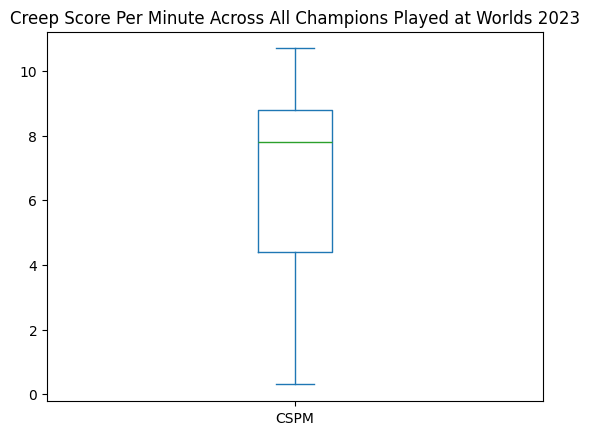

In [46]:
df_c['CSPM'].plot(kind='box', title='Creep Score Per Minute Across All Champions Played at Worlds 2023')

In [47]:
#Here, I am calculating the the interquartile range, as well as the first and third quartiles and their values.
quartiles = df_c['CSPM'].quantile([0.25, 0.75])
Q1 = quartiles[0.25]
Q3 = quartiles[0.75]
IQR = Q3 - Q1 
print("The interquartile range of the CS scores is " + IQR.astype(str) + ". The first and third quartiles are " + Q1.astype(str) + " and " + Q3.astype(str) + ".")


The interquartile range of the CS scores is 4.4. The first and third quartiles are 4.4 and 8.8.


Below is a histogram with the frequenices of CSPM scores across the champions played.

<Axes: title={'center': 'Creep Score Per Minute Across All Champions Played at Worlds 2023'}, ylabel='Frequency'>

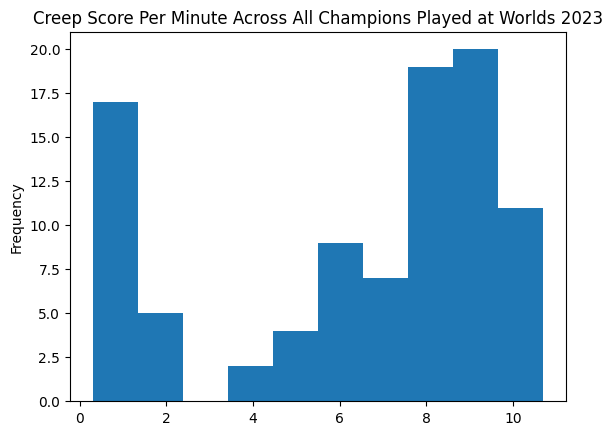

In [48]:
df_c['CSPM'].plot(kind = 'hist', title='Creep Score Per Minute Across All Champions Played at Worlds 2023')

As we can see from the graphs above, there appears to be a trend in higher CSPM. This results in a slight leftward-skew. On the histogram, we can see that many of the champions attained roughly 8-9 CSPM on average, as well as a good amount of champions having around 0-2 CSPM, which can be infered as champions playing the support role. In conclusion, our visualizations help us support the conclusion that most players who play at the highest level are able to farm efficiently and consistently. 

# Section 4: Data Science

With all this CSPM mumbo-jumbo, I'm left wondering whether or not that correlates to how many kills a champion was able to attain. "Kills" are how many times a a player is successfully able to take down an enemy player. A kill is registered to the player who lands the last attack to deplete an enemy player's health. The whole logic of scoring a high CSPM score is to enable yourself to buy items from the shop in-game to help you defeat other players more easily. Only one way to find out!



Below, I start by creating a new DataFrame containing all the champions that were played in at least 15 games at worlds this year. The reason for this being that a lot of champions were played 15 or less times and the stats obtained by those champions may negatively or positively skew our overall data. Paired with their low sample size of games played since only a certain number of games were played it may not be representative of what actually was the trend between kills and CSPM. I wanted to make sure that to an extent, I'd be able to apply the CLT (Central Limit Theorem) so that the data is somewhat normally distributed (although not perfectly), which is why I chose to sample champions with more than 15 games played as they, in theory, should provide the more consistent data that's hopefully more representative. This new DataFrame is called df_cc. I also needed to utilize the .copy() method when making this new dataframe as the compiler will not compile without it as it throws a SettingWithCopyWarning without it.

In [49]:
df_cc = df_c[df.GP > 15].copy()
df_cc 

C:\Users\lyons\AppData\Local\Temp\ipykernel_18636\1817495739.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_cc = df_c[df.GP > 15].copy()


,Champion,Pos,GP,P%,B%,P+B%,W%,CTR%,K,D,...,GD10,XPD10,CSD10,CSPM,CS%P15,DPM,DMG%,GOLD%,WPM,WCPM
0,Aatrox,Top,26,32.9%,3.8%,36.7%,54%,58%,77,72,...,-147,40,-5.9,8.3,25.3%,508,25.4%,22.7%,0.32,0.16
3,Alistar,Support,22,27.8%,24.1%,51.9%,27%,27%,14,78,...,-79,64,3.5,1.0,2.0%,120,6.4%,8.4%,1.63,0.28
4,Aphelios,ADC,22,27.8%,12.7%,40.5%,50%,59%,96,31,...,28,-36,-3.5,9.8,33.6%,612,30.3%,28.2%,0.4,0.32
7,Azir,Middle,27,34.2%,43.0%,77.2%,44%,52%,78,57,...,5,78,1,9.4,27.9%,596,28.0%,25.4%,0.48,0.31
26,Jarvan IV,Jungle,30,38.0%,46.8%,84.8%,57%,40%,79,68,...,-23,-64,-0.4,5.8,16.6%,285,13.2%,19.0%,0.35,0.43
27,Jax,Top,24,30.4%,31.6%,62.0%,50%,46%,61,70,...,-83,-50,-3.2,8.5,27.2%,506,24.5%,23.2%,0.47,0.14
33,K'Sante,Top,27,34.2%,19.0%,55.7%,41%,41%,63,79,...,-41,-94,-3.6,7.6,22.2%,413,19.5%,20.8%,0.4,0.18
34,Kai'Sa,ADC,33,41.8%,15.2%,57.0%,36%,39%,122,69,...,-19,-13,6.1,9.8,32.2%,493,25.5%,27.1%,0.58,0.41
50,Maokai,Jungle,22,27.8%,49.4%,77.2%,41%,9%,30,60,...,-234,-317,-8.4,4.7,12.4%,418,18.8%,16.0%,0.33,0.25
53,Neeko,Middle,17,21.5%,57.0%,78.5%,76%,47%,46,35,...,-10,-7,1,8.1,22.4%,504,22.9%,20.9%,0.32,0.26


Below, I create a new column with the average kills per champion across their games. This way, we aren't inaccurately calculating our results with every single kill earned by the champion throughout all the games. It is also required that we convert these columns to "float" values as they are currently all "objects" which cannot be used to make mathematical calculations.

In [50]:
df_cc['AVG K PER GAME'] = df_cc['K'].astype(float) / df_cc['GP'].astype(float)
df_cc

,Champion,Pos,GP,P%,B%,P+B%,W%,CTR%,K,D,...,XPD10,CSD10,CSPM,CS%P15,DPM,DMG%,GOLD%,WPM,WCPM,AVG K PER GAME
0,Aatrox,Top,26,32.9%,3.8%,36.7%,54%,58%,77,72,...,40,-5.9,8.3,25.3%,508,25.4%,22.7%,0.32,0.16,2.961538
3,Alistar,Support,22,27.8%,24.1%,51.9%,27%,27%,14,78,...,64,3.5,1.0,2.0%,120,6.4%,8.4%,1.63,0.28,0.636364
4,Aphelios,ADC,22,27.8%,12.7%,40.5%,50%,59%,96,31,...,-36,-3.5,9.8,33.6%,612,30.3%,28.2%,0.4,0.32,4.363636
7,Azir,Middle,27,34.2%,43.0%,77.2%,44%,52%,78,57,...,78,1,9.4,27.9%,596,28.0%,25.4%,0.48,0.31,2.888889
26,Jarvan IV,Jungle,30,38.0%,46.8%,84.8%,57%,40%,79,68,...,-64,-0.4,5.8,16.6%,285,13.2%,19.0%,0.35,0.43,2.633333
27,Jax,Top,24,30.4%,31.6%,62.0%,50%,46%,61,70,...,-50,-3.2,8.5,27.2%,506,24.5%,23.2%,0.47,0.14,2.541667
33,K'Sante,Top,27,34.2%,19.0%,55.7%,41%,41%,63,79,...,-94,-3.6,7.6,22.2%,413,19.5%,20.8%,0.4,0.18,2.333333
34,Kai'Sa,ADC,33,41.8%,15.2%,57.0%,36%,39%,122,69,...,-13,6.1,9.8,32.2%,493,25.5%,27.1%,0.58,0.41,3.696970
50,Maokai,Jungle,22,27.8%,49.4%,77.2%,41%,9%,30,60,...,-317,-8.4,4.7,12.4%,418,18.8%,16.0%,0.33,0.25,1.363636
53,Neeko,Middle,17,21.5%,57.0%,78.5%,76%,47%,46,35,...,-7,1,8.1,22.4%,504,22.9%,20.9%,0.32,0.26,2.705882


Here, I create a new Dataframe utilizing the previously updated DataFrame to create a new DataFrame with only the columns we want to compare, that being "CSPM" and "Average kills per game". I initialize this DataFrame calling it df_comparing.

In [51]:
comparing = ["CSPM", "AVG K PER GAME"]
comparing


df_comparing = df_cc[comparing]
df_comparing

,CSPM,AVG K PER GAME
0,8.3,2.961538
3,1.0,0.636364
4,9.8,4.363636
7,9.4,2.888889
26,5.8,2.633333
27,8.5,2.541667
33,7.6,2.333333
34,9.8,3.696970
50,4.7,1.363636
53,8.1,2.705882


Below is where I utilize the corr() method from the pandas library to find the correlation coefficient between kills and CSPM. Through the use of the seaborn library, I also create a scatterplot with a line of best fit to map out our findings. Before I make this scatterplot, I need to convert df_comparing to be values of type "float" because as stated earlier, this dataset reports everything as a type "object", thus the reason for my line of code that converts this dataframe to be floats.

In [52]:
df_comparing.corr()

,CSPM,AVG K PER GAME
CSPM,1.000000,0.905632
AVG K PER GAME,0.905632,1.000000


<Axes: xlabel='CSPM', ylabel='AVG K PER GAME'>

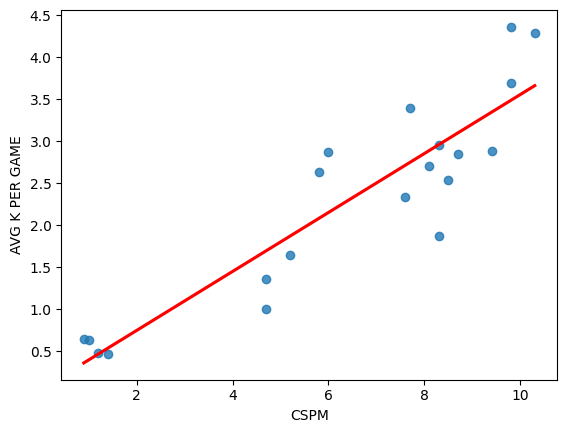

In [53]:
import seaborn as sns
df_comparing = df_comparing.astype("float")
sns.regplot(data=df_comparing, x="CSPM", y="AVG K PER GAME", ci=None, line_kws={'color':'red'})

Above is a scatterplot between CSPM and kills. From what the scatterplot is showing, it reflects a fairly strong and positive correlation between average CSPM for each champion played and number of kills acquired, which backs up the earlier r-value ( ~ 0.905) that we calculated. 

Now, I will write the following code to calculate an equation for the line of best fit from this scatterplot/regression line. We will then use this regression equation to create a column with a prediction of the average kills per game given a CSPM score, as well as a column containing the residuals.

In [54]:
# equation for linear regression line/ line of best fit : y = intercept + slope * X
# equation for slope : slope =  r * SDy/SDx
# equation for intercept : intercept = avg(y) - slope * avg(x)


In [55]:
slope = (df_comparing.corr()['CSPM']['AVG K PER GAME']) * ((df_comparing['AVG K PER GAME'].std()) / (df_comparing['CSPM'].std()))
slope
print("Our slope suggests that for every increment of 1 in our CSPM, we predict our kills to increase by " + slope.astype(str) + ".")

Our slope suggests that for every increment of 1 in our CSPM, we predict our kills to increase by 0.3514527894195615.


In [62]:
intercept = df_comparing['AVG K PER GAME'].mean() - slope * df_comparing['CSPM'].mean()
intercept
print("Our line of best fit/regression line is:  y = " + intercept.astype(str) + " + " + slope.astype(str) + "(X), with X representing any score of CSPM and y representing a predicted number of kills")

Our line of best fit/regression line is:  y = 0.043921746983289545 + 0.3514527894195615(X), with X representing any score of CSPM and y representing a predicted number of kills


In [57]:
df_cc['Predicted number of K'] = slope * df_cc['CSPM'] + intercept
df_cc['Residual'] = df_cc['AVG K PER GAME'] - df_cc['Predicted number of K']
df_cc

,Champion,Pos,GP,P%,B%,P+B%,W%,CTR%,K,D,...,CSPM,CS%P15,DPM,DMG%,GOLD%,WPM,WCPM,AVG K PER GAME,Predicted number of K,Residual
0,Aatrox,Top,26,32.9%,3.8%,36.7%,54%,58%,77,72,...,8.3,25.3%,508,25.4%,22.7%,0.32,0.16,2.961538,2.96098,0.000559
3,Alistar,Support,22,27.8%,24.1%,51.9%,27%,27%,14,78,...,1.0,2.0%,120,6.4%,8.4%,1.63,0.28,0.636364,0.395375,0.240989
4,Aphelios,ADC,22,27.8%,12.7%,40.5%,50%,59%,96,31,...,9.8,33.6%,612,30.3%,28.2%,0.4,0.32,4.363636,3.488159,0.875477
7,Azir,Middle,27,34.2%,43.0%,77.2%,44%,52%,78,57,...,9.4,27.9%,596,28.0%,25.4%,0.48,0.31,2.888889,3.347578,-0.458689
26,Jarvan IV,Jungle,30,38.0%,46.8%,84.8%,57%,40%,79,68,...,5.8,16.6%,285,13.2%,19.0%,0.35,0.43,2.633333,2.082348,0.550985
27,Jax,Top,24,30.4%,31.6%,62.0%,50%,46%,61,70,...,8.5,27.2%,506,24.5%,23.2%,0.47,0.14,2.541667,3.03127,-0.489604
33,K'Sante,Top,27,34.2%,19.0%,55.7%,41%,41%,63,79,...,7.6,22.2%,413,19.5%,20.8%,0.4,0.18,2.333333,2.714963,-0.38163
34,Kai'Sa,ADC,33,41.8%,15.2%,57.0%,36%,39%,122,69,...,9.8,32.2%,493,25.5%,27.1%,0.58,0.41,3.696970,3.488159,0.208811
50,Maokai,Jungle,22,27.8%,49.4%,77.2%,41%,9%,30,60,...,4.7,12.4%,418,18.8%,16.0%,0.33,0.25,1.363636,1.69575,-0.332113
53,Neeko,Middle,17,21.5%,57.0%,78.5%,76%,47%,46,35,...,8.1,22.4%,504,22.9%,20.9%,0.32,0.26,2.705882,2.890689,-0.184807


Awesome! We now have a dataframe with our predicted number of kills based on CSPM for every champion as well as some residuals. What now? Just for fun, I'm going to create a new dataframe of 3 champions from each role(top, jungle, mid, adc, and support) with the highest predicted kills in each of the respective roles, using our dataset and compare them to SK Telecom's final champion rosters in the 3 games out of 5 they played in the finals to win the world championship and see how close our selected 15 champions match with the champions T1 used to win the series. Here, we are assuming that champions with the greater predicted average kills a game constitutes to how good a champion is (this is far from the most reliable metric to determine how "good" a champion is but again, this is simply just for fun). 

The only exception I am making here is for the champions being picked from the "Support" role; I will select 3 champions with the most amount of assists as supports typically do not "kill" (defeating enemy players rewards the player who took them down with lot more gold than most monsters and minions reward, therefore, it's more efficient for players who's main job is to dish out damage and score kills to receive the gold earned from these takedowns so that they can get stronger faster). Thus, the more assists on average a support has, the more it implies that said support is a good champion for the support role. 

Using this link (https://liquipedia.net/leagueoflegends/T1/Played_Matches), I was able to find the match history of T1 and the champions they picked at finals. 

**Game 1 and Champions picked:** 

Top - Yone       

Jungle - Lee Sin   

Mid - Ahri

ADC - Kalista

Support - Renata Glasc

**Game 2 and Champions picked:**

Top - Gwen

Jungle - Nocturne

Mid - Sylas 

ADC - Draven

Support - Renata Glasc

**Game 3 and Champions picked:**

Top - Aatrox

Jungle - Lee Sin

Mid - Akali

ADC - Xayah

Support - Rakan

Below, I created a new column within the dataframe for "Average assists per game" that will be used when selecting a support champion (was also converted to a float as well because of reasons stated earlier).

In [58]:
df_cc['Avg A Per Game'] = df_cc['A'].astype(float) / df_cc['GP']
df_cc

,Champion,Pos,GP,P%,B%,P+B%,W%,CTR%,K,D,...,CS%P15,DPM,DMG%,GOLD%,WPM,WCPM,AVG K PER GAME,Predicted number of K,Residual,Avg A Per Game
0,Aatrox,Top,26,32.9%,3.8%,36.7%,54%,58%,77,72,...,25.3%,508,25.4%,22.7%,0.32,0.16,2.961538,2.96098,0.000559,3.538462
3,Alistar,Support,22,27.8%,24.1%,51.9%,27%,27%,14,78,...,2.0%,120,6.4%,8.4%,1.63,0.28,0.636364,0.395375,0.240989,6.227273
4,Aphelios,ADC,22,27.8%,12.7%,40.5%,50%,59%,96,31,...,33.6%,612,30.3%,28.2%,0.4,0.32,4.363636,3.488159,0.875477,3.409091
7,Azir,Middle,27,34.2%,43.0%,77.2%,44%,52%,78,57,...,27.9%,596,28.0%,25.4%,0.48,0.31,2.888889,3.347578,-0.458689,4.148148
26,Jarvan IV,Jungle,30,38.0%,46.8%,84.8%,57%,40%,79,68,...,16.6%,285,13.2%,19.0%,0.35,0.43,2.633333,2.082348,0.550985,8.566667
27,Jax,Top,24,30.4%,31.6%,62.0%,50%,46%,61,70,...,27.2%,506,24.5%,23.2%,0.47,0.14,2.541667,3.03127,-0.489604,3.083333
33,K'Sante,Top,27,34.2%,19.0%,55.7%,41%,41%,63,79,...,22.2%,413,19.5%,20.8%,0.4,0.18,2.333333,2.714963,-0.38163,4.777778
34,Kai'Sa,ADC,33,41.8%,15.2%,57.0%,36%,39%,122,69,...,32.2%,493,25.5%,27.1%,0.58,0.41,3.696970,3.488159,0.208811,3.303030
50,Maokai,Jungle,22,27.8%,49.4%,77.2%,41%,9%,30,60,...,12.4%,418,18.8%,16.0%,0.33,0.25,1.363636,1.69575,-0.332113,6.545455
53,Neeko,Middle,17,21.5%,57.0%,78.5%,76%,47%,46,35,...,22.4%,504,22.9%,20.9%,0.32,0.26,2.705882,2.890689,-0.184807,6.764706


Now below, I will create a new dataframe called df_predicted_roster and add 3 champions from each role that meets our current conditionals.

In [59]:
row_top = df_cc[df_cc.Pos == 'Top'].nlargest(3, 'Predicted number of K') 
row_jungle = df_cc[df_cc.Pos == 'Jungle'].nlargest(3, 'Predicted number of K')
row_mid = df_cc[df_cc.Pos == 'Middle'].nlargest(3, 'Predicted number of K')
row_adc = df_cc[df_cc.Pos == 'ADC'].nlargest(3, 'Predicted number of K')
row_sup = df_cc[df_cc.Pos == 'Support'].nlargest(3, 'Predicted number of K')

df_predicted_roster = pd.concat([row_top, row_jungle, row_mid, row_adc, row_sup], ignore_index=True, sort=False)
df_predicted_roster


,Champion,Pos,GP,P%,B%,P+B%,W%,CTR%,K,D,...,CS%P15,DPM,DMG%,GOLD%,WPM,WCPM,AVG K PER GAME,Predicted number of K,Residual,Avg A Per Game
0,Jax,Top,24,30.4%,31.6%,62.0%,50%,46%,61,70,...,27.2%,506,24.5%,23.2%,0.47,0.14,2.541667,3.03127,-0.489604,3.083333
1,Aatrox,Top,26,32.9%,3.8%,36.7%,54%,58%,77,72,...,25.3%,508,25.4%,22.7%,0.32,0.16,2.961538,2.96098,0.000559,3.538462
2,Renekton,Top,23,29.1%,15.2%,44.3%,39%,43%,43,59,...,24.5%,432,21.3%,21.8%,0.37,0.21,1.869565,2.96098,-1.091415,3.608696
3,Vi,Jungle,24,30.4%,21.5%,51.9%,33%,33%,69,67,...,17.9%,293,13.7%,19.5%,0.34,0.3,2.875000,2.152638,0.722362,5.666667
4,Jarvan IV,Jungle,30,38.0%,46.8%,84.8%,57%,40%,79,68,...,16.6%,285,13.2%,19.0%,0.35,0.43,2.633333,2.082348,0.550985,8.566667
5,Sejuani,Jungle,17,21.5%,15.2%,36.7%,53%,71%,28,38,...,13.6%,276,13.4%,16.5%,0.37,0.35,1.647059,1.871476,-0.224417,7.000000
6,Azir,Middle,27,34.2%,43.0%,77.2%,44%,52%,78,57,...,27.9%,596,28.0%,25.4%,0.48,0.31,2.888889,3.347578,-0.458689,4.148148
7,Orianna,Middle,34,43.0%,51.9%,94.9%,59%,12%,97,66,...,25.1%,523,26.6%,23.2%,0.44,0.22,2.852941,3.101561,-0.24862,6.411765
8,Neeko,Middle,17,21.5%,57.0%,78.5%,76%,47%,46,35,...,22.4%,504,22.9%,20.9%,0.32,0.26,2.705882,2.890689,-0.184807,6.764706
9,Xayah,ADC,27,34.2%,53.2%,87.3%,67%,7%,116,38,...,33.6%,596,27.5%,26.4%,0.42,0.33,4.296296,3.663885,0.632411,4.814815


As we can see, only Aatrox, Xayah, Rakan are in our predicted 3 best champions for each role at Worlds 2023 this year AND were utilized by T1 in the finals, based off our conditionals. The reason why some of the other champions played by T1 don't appear in our dataframe is because earlier in Section 4, we cut out a lot of champions based off games picked, which although may have helped ensure our calculations be, in theory, more representative, this paradoxically doesn't represent the rest of the champions played at world this year. If given a larger database, this might've not been an issue, but since we're working with the Worlds 2023 dataset and how it has a smaller sample size, some shortcuts had to be made. 

One last thing just for fun, below is a function I created that takes our theoretical best champions from Worlds 2023 and creates a random team of a champion from each role based off our dataset.

In [68]:
import random
def createBestTeamWorlds2023() :
    data = []
    top = df_predicted_roster.iloc[random.randint(0,2)]
    jungle = df_predicted_roster.iloc[random.randint(3,5)]
    mid = df_predicted_roster.iloc[random.randint(6,8)]
    adc = df_predicted_roster.iloc[random.randint(9,11)]
    sup = df_predicted_roster.iloc[random.randint(12,14)]
    data.append(top)
    data.append(jungle)
    data.append(mid)
    data.append(adc)
    data.append(sup)
    dfn = pd.DataFrame(data)
    return dfn
createBestTeamWorlds2023()

,Champion,Pos,GP,P%,B%,P+B%,W%,CTR%,K,D,...,CS%P15,DPM,DMG%,GOLD%,WPM,WCPM,AVG K PER GAME,Predicted number of K,Residual,Avg A Per Game
0,Jax,Top,24,30.4%,31.6%,62.0%,50%,46%,61,70,...,27.2%,506,24.5%,23.2%,0.47,0.14,2.541667,3.031270,-0.489604,3.083333
4,Jarvan IV,Jungle,30,38.0%,46.8%,84.8%,57%,40%,79,68,...,16.6%,285,13.2%,19.0%,0.35,0.43,2.633333,2.082348,0.550985,8.566667
8,Neeko,Middle,17,21.5%,57.0%,78.5%,76%,47%,46,35,...,22.4%,504,22.9%,20.9%,0.32,0.26,2.705882,2.890689,-0.184807,6.764706
10,Aphelios,ADC,22,27.8%,12.7%,40.5%,50%,59%,96,31,...,33.6%,612,30.3%,28.2%,0.4,0.32,4.363636,3.488159,0.875477,3.409091
12,Rakan,Support,30,38.0%,34.2%,72.2%,57%,23%,14,63,...,3.3%,134,6.8%,9.2%,2.06,0.56,0.466667,0.535956,-0.069289,8.633333


# Section 5: Overall Summary

In conclusion, I utilized the dataset of matches played at League of Legends Worlds 2023, primarily focusing in Champion performance in the "Average Creep Score per Minute". I used the data in this column and found the overall descriptive statistics which includes the minimum, maximum, medium, mean, and range of CSPM scores across all the champions, as well as creating dataframes featuring the champions with the greatest CSPM score at Worlds 2023 using various method. I then made a visual representation of the CSPM distribution with a boxplot and histogram. Furthermore, I created a linear regression model predicting the average "kills" each champion is expected to have given their CSPM. In addition to this, I created a new dataframe featuring champions with the highest predicted kills and compared them to the champions that the World champions SK Telecom 1 to see how similar they were, as well as using this new dataframe of the champions with the most amount of kills to create a function that in theory, simulates the best teams at Worlds 2023 if the only metric was based off these predicted kill counts. 